In [5]:
import sqlite3
import datetime
import pandas as pd

connection = sqlite3.connect('data.db')

def season_to_date(year, season):
    date = {
        1: datetime.date(year, 5, 15),
        2: datetime.date(year, 8, 14),
        3: datetime.date(year, 11, 14),
        4: datetime.date(year + 1, 3, 31),
    }
    return date[season]

def get_financial_statements(year, season, table, field):
    
    date = season_to_date(year, season).strftime("%Y-%m-%d 00:00:00")

    df = pd.read_sql('SELECT 證券代號, 日期, {} FROM {} WHERE 日期 = "{}"'.format(field, table, date),
                     connection,
                     parse_dates=['日期'])
    
    return df.pivot(index='日期', columns='證券代號', values=field)

In [9]:
稅後淨利 = get_financial_statements(2019, 1, 'income_statement', '本期淨利（淨損）').iloc[0]
權益總額 = get_financial_statements(2019, 1, 'balance_sheet', '權益總額').iloc[0]

股東權益報酬率 = 稅後淨利 / 權益總額 * 100
股東權益報酬率

股票清單 = 股東權益報酬率[股東權益報酬率 > 10]
股票清單

證券代號
1201    15.129882
1465    43.372106
1515    24.417332
2206    12.112182
3535    12.430744
3563    19.058880
4994    14.365402
5269    10.404786
6177    12.732420
Name: 2019-05-15 00:00:00, dtype: float64

In [10]:
def get_daily_prices(field, start, end):
    
    df = pd.read_sql('SELECT 證券代號, 日期, {} FROM daily_prices WHERE 日期 BETWEEN "{}" AND "{}"'.format(field, start, end),
                     connection,
                     parse_dates=['日期'])
    
    return df.pivot(index='日期', columns='證券代號', values=field)

In [11]:
股價 = get_daily_prices('收盤價', '2019-05-15', '2019-08-14 01')
股價

證券代號,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
日期,,,,,,,,,,,,,,,,,,,,,
2019-05-15,79.75,31.20,53.05,34.15,21.44,17.25,26.18,50.55,45.56,43.85,...,31.80,114.5,53.8,71.3,65.7,15.85,41.00,19.30,12.35,62.6
2019-05-16,79.05,30.96,52.45,33.83,21.25,17.08,25.92,50.10,45.33,43.77,...,31.50,113.0,53.9,71.5,65.7,15.90,40.30,19.70,12.75,60.0
2019-05-17,78.25,30.73,51.95,33.12,21.00,17.12,25.70,49.57,45.08,43.66,...,31.30,112.5,53.8,71.6,66.3,15.90,40.05,19.60,12.75,60.8
2019-05-20,78.20,30.60,51.00,32.91,20.91,17.25,25.70,49.35,44.98,44.10,...,31.75,113.0,53.9,71.2,66.7,15.95,40.70,19.50,12.55,64.4
2019-05-21,78.40,30.96,50.55,32.89,21.04,17.60,25.76,49.51,45.45,44.83,...,31.95,115.5,53.8,71.7,66.7,15.95,40.75,19.90,12.65,63.1
2019-05-22,78.40,31.00,51.25,33.11,20.99,17.47,25.79,49.59,45.32,44.62,...,32.40,115.0,53.8,71.7,66.8,15.95,40.65,20.00,13.90,62.4
2019-05-23,76.95,30.45,49.79,32.24,20.67,17.38,25.44,48.58,44.52,44.59,...,32.00,111.5,53.9,71.2,66.6,16.00,40.30,20.05,13.55,63.1
2019-05-24,77.35,30.45,50.00,32.26,20.63,17.46,25.44,48.76,44.55,44.65,...,32.20,111.5,53.8,71.8,66.8,16.00,40.15,20.25,13.05,62.3
2019-05-27,77.15,30.35,49.83,32.04,20.57,17.52,25.45,48.63,44.53,44.88,...,32.70,110.0,53.8,73.3,67.0,16.00,40.75,21.35,13.25,62.2


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Date')]

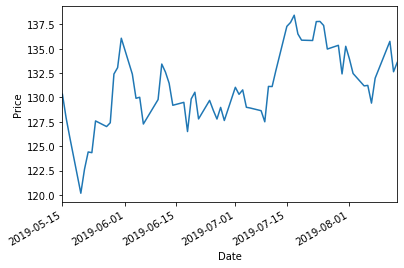

In [22]:
%matplotlib inline

股價[股票清單.index].mean(axis=1).plot().set(xlabel='Date', ylabel='Price')

In [23]:
期初投入 = 0
期末淨值 = 0

for 股票 in 股票清單.index:
    
    買入 = 股價[股票].iloc[0]
    賣出 = 股價[股票].iloc[-1]
    
    print('股票{}買入{}元，賣出{}元'.format(股票, 買入, 賣出))
    
    期初投入 += 買入
    期末淨值 += 賣出

print('投入{}元'.format(期初投入 * 1000))
print('賣出{}元'.format(期末淨值 * 1000))
print('賺（賠）{}元'.format((期末淨值 - 期初投入) * 1000))
print('報酬率 {}%'.format((期末淨值 - 期初投入) / 期初投入 * 100))

股票1201買入27.95元，賣出26.5元
股票1465買入14.6元，賣出14.2元
股票1515買入73.0元，賣出102.5元
股票2206買入20.2元，賣出20.65元
股票3535買入36.2元，賣出27.0元
股票3563買入381.0元，賣出333.0元
股票4994買入79.8元，賣出93.7元
股票5269買入510.0元，賣出556.0元
股票6177買入30.2元，賣出28.85元
投入1172950.0元
賣出1202400.0元
賺（賠）29450.000000000044元
報酬率 2.5107634596530155%
